# 1.How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Let A = (n, k) and B = (k, m) be the two matrix values. The number of multiplication in the matrix multiplication will be c = n*k*m. There must be a multiplication of k for each element in c when we multiply A by B, which results in (n,m) dimensions in c. For instance, multiplying A(0,0) by B(0,0), A(0,1) by B(1,0), A(0,2) by B(2,0)...k times will result in nmk multiplications overall.


 Let A=(n,k) and B=(k,m). The number of addition in the matrix multiplication between them will be c=n*(k-1)*m. Multiplying A by B results in (n,m) dimensions in c, and there has to be a k-1 addition for each element in c. For instance, A(0,0)*B(0,0), A(0,1)*B(1,0), A(0,2)*B(2,0)...k times. Since we need to add k-1 for per k multiplication, the total number of additions will be n*m*(k-1).


# 2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import numpy as np
import time
st = time.time()
#  matrix multiplication using list

#  Let x is a 3*3 matrix

x = [[1,2,3],
	[4,5,6],
	[7,8,]]

#  Let y is a 3*4 matrix
y = [[2,3,4,5],
	[5,4,6,7],
	[2,5,6,7]]

#  result
result = [[sum(n * m for n, m in zip(x_row, y_col))
						for y_col in zip(*y)]
								for x_row in x]

for res in result:
	print(res)
et = time.time()
total_time = et - st
print(' Time:list', total_time, )


#now multiplication with numpy

st = time.time()
x = [[1,2,3],
	[3,4,5],
	[5,6,7]]

#  Let y is a 3*4 matrix
y = [[2,3,4,5],
	[7,4,6,8],
	[3,5,6,7]]

print(np.matmul(x,y))
et = time.time()
total_time = et - st
print('Time:for numpy', total_time,)





[18, 26, 34, 40]
[45, 62, 82, 97]
[54, 53, 76, 91]
 Time:list 0.0005960464477539062
[[ 25  26  34  42]
 [ 49  50  66  82]
 [ 73  74  98 122]]
Time:for numpy 0.0061757564544677734


# 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [ ]:
import random
import time
import  numpy as np

n = random.randint(1, 100)
arr = [random.random() for i in range(n)]

def using_passes(arr, n):
    hashmap = {}
    for i in range(n):
        hashmap[arr[i]]= -1
    key =[]
    for i in range(n//2+1):
        maxi = arr[0]
        for j in range(n):
            if maxi <= arr[j]:
                maxi = arr[j]
                index = j

        if (hashmap[maxi] != index):
            hashmap[maxi] = index
            key.append(maxi)
            arr[index] = -1
    if (n%2==0):
        median = (key[-1]+key[-2])/2
    else:
        median = key[-1]
    return median

def using_sorting(arr, n):
    arr.sort()
    if (n%2==0):
        median = (arr[n//2]+arr[n//2-1])/2
    else:
        median = arr[n//2]
    return median

def median_np(arr, n):
    return np.median(arr)

print("Using Passes: ", using_passes(arr.copy(), n))
print("Using optimal sorting method: ", using_sorting(arr, n))
print("using np.median: ", median_np(arr, n))

Using Passes:  0.4359435552632822
Using optimal sorting method:  0.4359435552632822
using np.median:  0.4359435552632822


In [ ]:
passesArr=[]
optimalArr=[]
numpyArr = []

def Sum(arr):
  sum_ = 0
  for i in arr:
    sum_ += i
  return sum_

for i in range(100):
    n = random.randint(1, 100)
    arr = [random.random() for i in range(n)]
    dup = arr.copy()
    start = (time.time())*100
    med= using_passes(dup, n)
    end = (time.time())*100
    passesArr.append(end-start)

    start = (time.time())*100
    med = using_sorting(arr, n)
    end = (time.time())*100
    optimalArr.append(end-start)

    start = (time.time())*100
    med = median_np(arr, n)
    end = (time.time())*100
    numpyArr.append(end-start)

print("Average time - PASSES= ", Sum(passesArr) )
print("Average time(Sorting) = ", Sum(optimalArr)/100)
print("Average time(np.numpy) = ", Sum(numpyArr)/100)

Average time - PASSES=  1.63543701171875
Average time(Sorting) =  0.00055084228515625
Average time(np.numpy) =  0.007081298828125


# 4. What is the gradient of the following function with respect to x and y?

# $ x^2y + y^3sin(x) $

Given function is $ f(x, y)  = x^2y + y^3sin(x) $

Gradient of the function $f (x, y) $ with respect to x

$\partial f / \partial x = 2xy + y^3 cos(x)$

Gradient of the function $f (x, y) $ with respect to y:

 $\partial f / \partial y = x^2 + 3y^2 sin(x)$

 Therefore, the gradient of the function is $ (2xy + y^3 cos(x), x^2 + 3y^2 sin(x))$

# 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
# import libraries
import random
import jax
import jax.numpy as npy

def f(x, y):
    return (x**2)*y + (y**3)*npy.sin(x)

def gradX(x, y):
    return 2*x*y + (y**3)*npy.cos(x)

def gradY(x, y):
    return (x**2)+ 3*(y**2)*npy.sin(x)

#selecting random x and y
x = random.random()
y = random.random()

value_gradX = gradX(x, y)
value_gradY = gradY(x, y)

JaxGradX = jax.grad(f, 0)
JaxGradY = jax.grad(f, 1)

print(f"Manual Gradient values: ({value_gradX}, {value_gradY})")
print(f"Jax Gradient values: ({JaxGradX(x, y)}, {JaxGradY(x, y)})")



Manual Gradient values: (0.4666743874549866, 0.186200812458992)
Jax Gradient values: (0.4666743874549866, 0.186200812458992)


# 6.Use sympy to confirm that you obtain the same gradient analytically


In [ ]:
from sympy import *

x, y = symbols('x, y')

f = y * x**2 + sin(x) * y ** 3

D = Matrix([f]).jacobian(list(f.free_symbols))
print(D)

Matrix([[x**2 + 3*y**2*sin(x), 2*x*y + y**3*cos(x)]])


# 7.Python nested dictionary to represent hierarchical information.

In [ ]:
import random as rd

students = {
    2022: {
        "\t1. Branch1\n\t\t": {
            "1.Roll_no": "1",
            "2.name": "N",
            "marks": {'1.math': rd.randint(30, 95), "2.english": rd.randint(30, 95)}
        },
        "\t2. Branch2\n\t\t": {
            "1.Roll_no": "1",
            "2.name": "A",
            "marks": {'1.math': (30, 95), "2.english": rd.randint(30, 95)}
        }
    },
    2023: {
        "\t1. Branch1\n\t\t": {
            "1.Roll_no": "1",
            "2.name": "N",
            "marks": {'1.math': rd.randint(30, 95), "2.english": rd.randint(30, 95)}
        },
        "\t2. Branch2\n\t\t": {
            "1.Roll_no": "1",
            "2.name": "N",
            "marks": {'1.math': rd.randint(30, 95), "2.english": rd.randint(30, 95)}
        }
    },
    2024: {
        "\t1. Branch1\n\t\t": {
            "1.Roll_no": "1",
            "2.name": "N",
            "marks": {'1.math': rd.randint(30, 95), "2.english": rd.randint(30, 95)}
        },
        "\t2. Branch2\n\t\t": {
            "1.Roll_no": "1",
            "2.name": "N",
            "marks": {'1.math': rd.randint(30, 95), "2.english": rd.randint(30, 95)}
        }
    },
    2025: {
        "\t1. Branch1\n\t\t": {
            "1.Roll_no": "1",
            "2.name": "N",
            "marks": {'1.math': rd.randint(30, 95), "2.english": rd.randint(30, 95)}
        },
        "\t2. Branch2\n\t\t": {
            "1.Roll_no": "1",
            "2.name": "N",
            "marks": {'1.math': rd.randint(30, 95), "2.english": rd.randint(30, 95)}
        }
    }
}

for year, info in students.items():
    print(year)

    for branch, details in info.items():
        print(branch + ':')

        for key, value in details.items():
            print(f"\t{key}: {value}")


2022
	1. Branch1
		:
	1.Roll_no: 100
	2.name: A
	marks: {'1.math': 80, '2.english': 64}
	2. Branch2
		:
	1.Roll_no: 100
	2.name: A
	marks: {'1.math': (30, 95), '2.english': 76}
2023
	1. Branch1
		:
	1.Roll_no: 100
	2.name: A
	marks: {'1.math': 69, '2.english': 66}
	2. Branch2
		:
	1.Roll_no: 100
	2.name: A
	marks: {'1.math': 84, '2.english': 82}
2024
	1. Branch1
		:
	1.Roll_no: 100
	2.name: A
	marks: {'1.math': 34, '2.english': 61}
	2. Branch2
		:
	1.Roll_no: 100
	2.name: A
	marks: {'1.math': 79, '2.english': 86}
2025
	1. Branch1
		:
	1.Roll_no: 100
	2.name: A
	marks: {'1.math': 85, '2.english': 35}
	2. Branch2
		:
	1.Roll_no: 100
	2.name: A
	marks: {'1.math': 59, '2.english': 83}


It may be seen that doing matrix multiplication using numpy is quicker than using a list.

## 10.Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))


df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
print(df)

print(df.std().idxmax())



print(df.mean(axis=1).idxmin())



           a         b         c         d         e
0   1.930906  1.793557  1.888750  1.669328  1.319285
1   1.235916  1.846962  1.570127  1.066417  1.636377
2   1.870551  1.184956  1.755344  1.935802  1.291055
3   1.383187  1.151566  1.506804  1.947982  1.903389
4   1.415033  1.333338  1.676815  1.607375  1.046268
5   1.050127  1.379144  1.203448  1.122509  1.225268
6   1.081905  1.423263  1.521396  1.878551  1.129358
7   1.121482  1.417464  1.099593  1.673144  1.210261
8   1.195771  1.396935  1.153646  1.782123  1.210058
9   1.613892  1.758428  1.550057  1.964429  1.987798
10  1.011802  1.664136  1.503605  1.336395  1.650006
11  1.863017  1.867520  1.554884  1.025729  1.591437
12  1.620602  1.548333  1.179916  1.089622  1.518110
13  1.699908  1.337982  1.016318  1.906373  1.634245
14  1.041935  1.984857  1.304718  1.631458  1.108220
15  1.318382  1.146610  1.921282  1.544773  1.731764
16  1.240482  1.259032  1.927479  1.835720  1.773908
17  1.514441  1.161503  1.780214  1.839823  1.

# 11.Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
df['f'] = df.sum(axis = 1)
print(df)

           a         b         c         d         e         f
0   1.930906  1.793557  1.888750  1.669328  1.319285  8.601826
1   1.235916  1.846962  1.570127  1.066417  1.636377  7.355798
2   1.870551  1.184956  1.755344  1.935802  1.291055  8.037708
3   1.383187  1.151566  1.506804  1.947982  1.903389  7.892929
4   1.415033  1.333338  1.676815  1.607375  1.046268  7.078829
5   1.050127  1.379144  1.203448  1.122509  1.225268  5.980497
6   1.081905  1.423263  1.521396  1.878551  1.129358  7.034473
7   1.121482  1.417464  1.099593  1.673144  1.210261  6.521945
8   1.195771  1.396935  1.153646  1.782123  1.210058  6.738533
9   1.613892  1.758428  1.550057  1.964429  1.987798  8.874603
10  1.011802  1.664136  1.503605  1.336395  1.650006  7.165944
11  1.863017  1.867520  1.554884  1.025729  1.591437  7.902587
12  1.620602  1.548333  1.179916  1.089622  1.518110  6.956583
13  1.699908  1.337982  1.016318  1.906373  1.634245  7.594825
14  1.041935  1.984857  1.304718  1.631458  1.108220  7

In [ ]:
def categorize_number(num):
    return "LT8" if num < 8 else "GT8"


df['g'] = df['f'].apply(categorize_number)


print(df)

           a         b         c         d         e         f    g
0   1.930906  1.793557  1.888750  1.669328  1.319285  8.601826  GT8
1   1.235916  1.846962  1.570127  1.066417  1.636377  7.355798  LT8
2   1.870551  1.184956  1.755344  1.935802  1.291055  8.037708  GT8
3   1.383187  1.151566  1.506804  1.947982  1.903389  7.892929  LT8
4   1.415033  1.333338  1.676815  1.607375  1.046268  7.078829  LT8
5   1.050127  1.379144  1.203448  1.122509  1.225268  5.980497  LT8
6   1.081905  1.423263  1.521396  1.878551  1.129358  7.034473  LT8
7   1.121482  1.417464  1.099593  1.673144  1.210261  6.521945  LT8
8   1.195771  1.396935  1.153646  1.782123  1.210058  6.738533  LT8
9   1.613892  1.758428  1.550057  1.964429  1.987798  8.874603  GT8
10  1.011802  1.664136  1.503605  1.336395  1.650006  7.165944  LT8
11  1.863017  1.867520  1.554884  1.025729  1.591437  7.902587  LT8
12  1.620602  1.548333  1.179916  1.089622  1.518110  6.956583  LT8
13  1.699908  1.337982  1.016318  1.906373  1.63

## 9.Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5

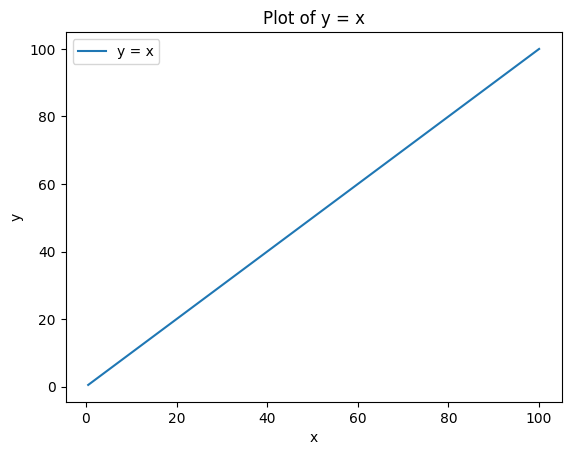

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return x


x_values = np.arange(0.5, 100.5, 0.5)

y_values = func(x_values)

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')


plt.legend()

plt.show()


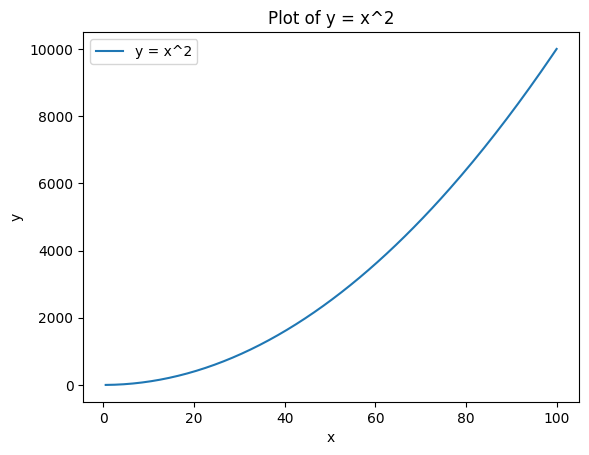

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return x**2


x_values = np.arange(0.5, 100.5, 0.5)

y_values = func(x_values)

plt.plot(x_values, y_values, label='y = x^2')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')


plt.legend()

plt.show()


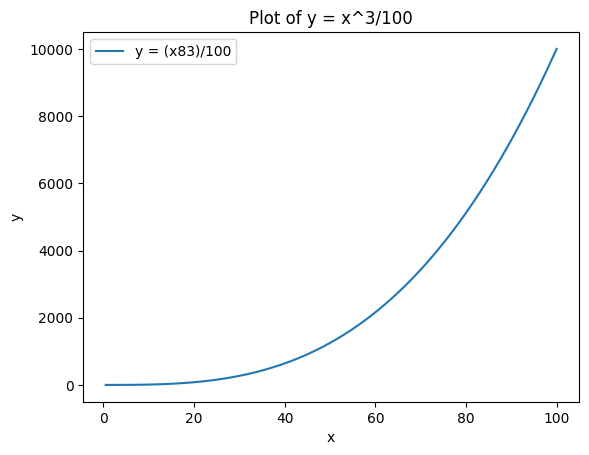

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return x**3/100


x_values = np.arange(0.5, 100.5, 0.5)

y_values = func(x_values)

plt.plot(x_values, y_values, label='y = (x83)/100')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^3/100')


plt.legend()

plt.show()


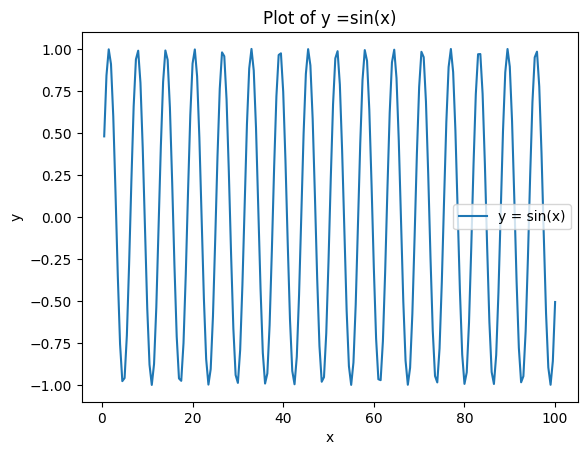

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.sin(x)


x_values = np.arange(0.5, 100.5, 0.5)

y_values = func(x_values)

plt.plot(x_values, y_values, label='y = sin(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y =sin(x)')


plt.legend()

plt.show()


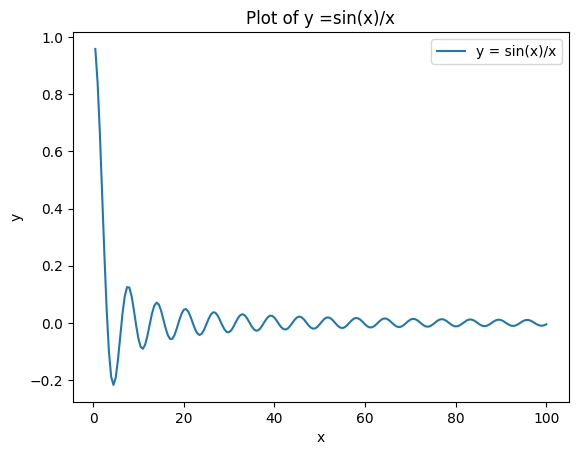

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.sin(x)/x


x_values = np.arange(0.5, 100.5, 0.5)

y_values = func(x_values)

plt.plot(x_values, y_values, label='y = sin(x)/x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y =sin(x)/x')


plt.legend()

plt.show()


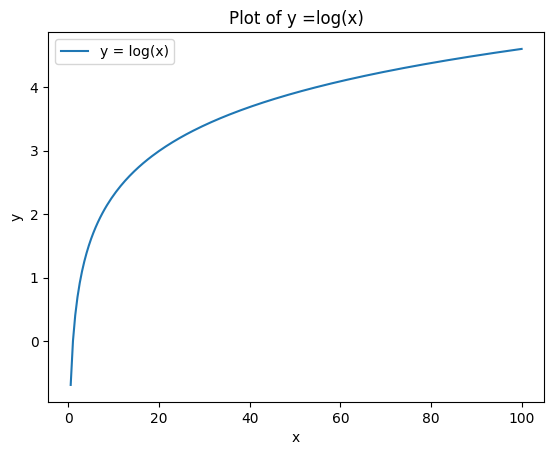

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.log(x)


x_values = np.arange(0.5, 100.5, 0.5)

y_values = func(x_values)

plt.plot(x_values, y_values, label='y = log(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y =log(x)')


plt.legend()

plt.show()


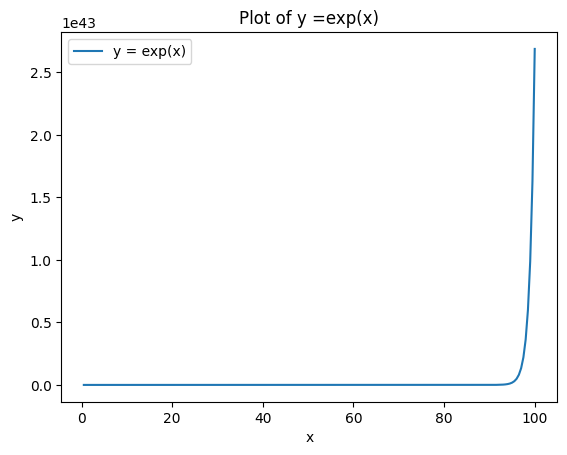

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.exp(x)


x_values = np.arange(0.5, 100.5, 0.5)

y_values = func(x_values)

plt.plot(x_values, y_values, label='y = exp(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y =exp(x)')


plt.legend()

plt.show()


# 12. Write a small piece of code to explain broadcasting in numpy.


$Broadcasting:$ Broadcasting is a technique in numpy that is used to manipulate the shape of the array to perform certain tasks with creating multiple copies of an array i.e., it enables operations on arrays with different shapes and sizes.

In [ ]:
import random
import numpy as np
# sample matrices

A = np.array([[1, 2, 3], [4, 5, 6]]) #size = 2 x 3
B = np.array([[1, 2, 3]])  #size = 1 x 3

#Addition of array of different sizes
sum = A + B
print(sum)
print("size of A+B: ",sum.size)




[[2 4 6]
 [5 7 9]]
size of A+B:  6


Here, the array B is broadcasted to match the size of array A

In [ ]:
A = np.array([1, 2, 3])
B = 2
print(A+B)

[3 4 5]


This is an another example of broadcasting

# 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
def argmin_manual (Matrix):
  FlatMatrix = Matrix.flatten()
  mini_value = FlatMatrix[0]
  index =  None
  for i in range (len (FlatMatrix)):
    if FlatMatrix[i] < mini_value:
      mini_value = FlatMatrix[i]
      index = i
  return index

Matrix = [[[63, 7, 59], [123, 40, 68]], [[77, -24, 0], [36, 4, 19]], [[-91, 8, 3], [1, 2, 3]]]
print("Index with minimum value (using the defined argmin): ", argmin_manual(np.array(Matrix)))
print("Index with minimum value (using the defined np.argmin): ", np.argmin(np.array(Matrix)))


Index with minimum value (using the defined argmin):  12
Index with minimum value (using the defined np.argmin):  12
